In [1]:
import matplotlib.pyplot as plt
import math

In [3]:
dataset = open('IR-assignment-2-data.txt', 'r')
queryList = []

for pair in dataset:
    pairDict = {}
    pairList = pair.split()
    pairDict['relevance'] = int(pairList[0])
    pairDict['qid'] = int(pairList[1][4:])
    
    for i in range(2, len(pairList)):
        key, value = pairList[i].split(":")
        key = int(key)
        pairDict[key] = float(value)
    
    if pairDict['qid'] == 4:
        queryList.append(pairDict)

In [ ]:
def calculateDCG(queryLst):
    discountedcumgain = 0
    
    for i in range(len(queryLst)):
        rel = queryLst[i]['relevance']
        rank = i + 1

        dcg = (2 ** rel - 1) / math.log2(rank + 1)
        discountedcumgain += dcg
        
    return discountedcumgain

### **Query URL pairs in order of max dcg**

In [ ]:
# The DCG is maximum when query-url pair is arranged in decreasing order of Relevance

#Sort in decreasing order of relevance score
sortedQueryList = queryList.copy()
sortedQueryList = sorted(sortedQueryList, key = lambda k: k['relevance'], reverse = True)

print('Maximum DCG: ', calculateDCG(sortedQueryList))

Maximum DCG:  28.98846753873482


In [ ]:
queryUrlPairFile = open('queryUrlPairFile.txt', 'w')

for queryurl in sortedQueryList:
    
    for key in queryurl:
        if key == 'relevance':
            queryUrlPairFile.write(f'{queryurl[key]} ')
        else:
            queryUrlPairFile.write(f'{key}:{queryurl[key]:g} ')
    queryUrlPairFile.write('\n')

### **No of Files**


In [ ]:
no_rel0 = 0
no_rel1 = 0
no_rel2 = 0
no_rel3 = 0
no_of_files = 1
for queryurl in queryList:
    
    if queryurl['relevance'] == 0:
        no_rel0 += 1
        
    if queryurl['relevance'] == 1:
        no_rel1 += 1

    if queryurl['relevance'] == 2:
        no_rel2 += 1

    if queryurl['relevance'] == 3:
        no_rel3 += 1

no_of_files = no_of_files * math.factorial(no_rel0) * math.factorial(no_rel1) * math.factorial(no_rel2) * math.factorial(no_rel3)
print('No of Files:', no_of_files)


No of Files: 19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


### **nDCG at rank 50**

In [ ]:
dcg50 = calculateDCG(queryList[0:51])
idcg50 = calculateDCG(sortedQueryList[0:51])

ndcg50 = dcg50 / idcg50
print('Normalized Discounted Cumulative Gain at rank 50: ', ndcg50)

Normalized Discounted Cumulative Gain at rank 50:  0.35612494416255847


### **nDCG for Whole Dataset**


In [ ]:
dcg = calculateDCG(queryList)
idcg = calculateDCG(sortedQueryList)

ndcg = dcg / idcg
print('Normalized Discounted Cumulative Gain for dataset: ', ndcg)

Normalized Discounted Cumulative Gain for dataset:  0.5784691984582591


### **Precision - Recall Curve**

In [ ]:
tdfidfQueryList = queryList.copy()
#The 75 feature id corresponds to sum of tf*idf for whole document
tdfidfQueryList = sorted(tdfidfQueryList, key = lambda k: k[75], reverse = True)

retrievedItems = 0
relevantItems = 0
totalrelevantItems = 0
precisionList = []
recallList = []

#Non zero relevance judgement value to be relevant
for i in range(len(tdfidfQueryList)):
    if tdfidfQueryList[i]['relevance'] > 0:
        totalrelevantItems += 1

for i in range(len(tdfidfQueryList)):
    if tdfidfQueryList[i]['relevance'] > 0:
        relevantItems += 1
        
    retrievedItems += 1
    precision = relevantItems / retrievedItems
    precisionList.append(precision)
    
    recall = relevantItems / totalrelevantItems
    recallList.append(recall)


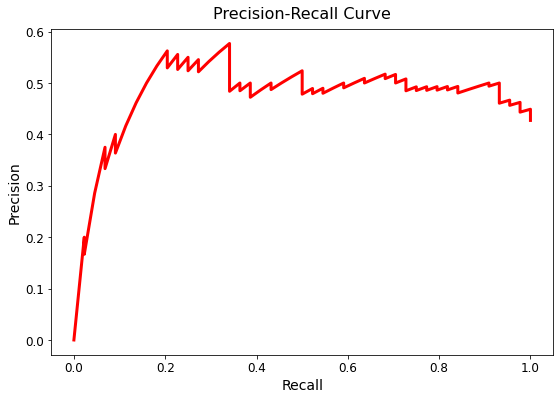

In [ ]:
plt.figure(figsize=(9, 6))
plt.title('Precision-Recall Curve', size = 16, pad = 10)
plt.plot(recallList, precisionList, color = 'r', linewidth = 3)
plt.xlabel('Recall', fontsize = 14)
plt.ylabel('Precision', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()